In [188]:
import numpy as np
from scipy import stats
import pandas as pd 
import matplotlib.pyplot as plt 

In [ ]:
# Python recipe for performing the 1-sample t-test 

![dist](mydist.png)

### Error bar represents standard deviation 

In [190]:
# we will draw numbers from a random normal distribution - set mean and standard deviation 
mymean=10 
mystd=2.0 
myN=5
# if you want to draw the same random numbers or compare with a friend then 
# set the random number seed the same 
np.random.seed(666123)

# make sure you understand all the arguments 
myrand=np.random.normal(loc=mymean,scale=mystd,size=myN)

# just print out some basic descriptive stats 
print myrand
print myrand.mean()
print myrand.std(ddof=1)
# this is the s.e.m. - showed formula in class 
print stats.sem(myrand,ddof=1)

[ 12.81114783  12.8137603    6.80118985   9.47546101   8.6891657 ]
10.1181449378
2.64460876472
1.18270499436


In [114]:
# here is the hand calculation for the t-score, based on our formula 
t=(myrand.mean()-mymean)/stats.sem(myrand)
print t

0.0998938351936


In [115]:
# the function stats.t.sf is the lookup value - given a t-score it will
# provide you the 1-sided p-value.  Feed the abs value of t-score and multiple by 2 
# to obtain the standard 2-sided p-value! 
stats.t.sf(np.abs(t),myrand.size-1)*2

0.92523496958933249

In [116]:
# you can also just use this function to directly output the t/p values
stats.ttest_1samp(myrand,mymean)

Ttest_1sampResult(statistic=0.099893835193612959, pvalue=0.92523496958933249)

In [117]:
# and this is how you store the output in two separate variables 
[tcalc,p]=stats.ttest_1samp(myrand,mymean)

## Calculation of 95% CI manually and with python tools 

The CI is given by: $ \bar x \pm t^* * s.e.m.$

* _t*_  is the critical t-value at a given combination of P and (N-1)  
* Take care with 1-sided vs. 2-sided.  For the majority of examples you will want to use 2-sided

In [191]:
## Inverse lookup of critical t value at P=0.05 (2-sided) for our system above
tcrit=stats.t.ppf(1-.025,myN-1)

In [192]:
## calculation of the 95% CI w/above formula
my95CI=stats.sem(myrand)*tcrit

In [193]:
## we can use a python stats tool to do this dirty work for us 
## usage: 
## stats.t.interval($CI, d.o.f., loc=mean, scale=sem)
## the output are the Lower and Upper bounds of the 95% CI.  
[L,U]=stats.t.interval(.95,myN-1,loc=myrand.mean(), scale=stats.sem(myrand))
print L,U
print (U-L)/2

6.8344294453 13.4018604303
3.28371549249


In [194]:
## Let me convince you my hand calc matches the stats tool 
print myrand.mean()-(U-L)/2
print myrand.mean()-my95CI

6.8344294453
6.8344294453


### Regression example


$Y=\theta_1*X_1+\theta_2*X_2+\theta_3*X_1*X_2 $ 

In [172]:
#So we can all get the same results
np.random.seed(3456)
#Range of Xdata
Xdata=np.zeros((200,2))
Xdata[:,0]=np.linspace(0,200,200)
Xdata[:,1]=np.linspace(-25,25,200)
#coefficients
T1a=2.5
T2a=-1.5
T3a=0.34

#define your function
def mycoolfun(Xdata,T1,T2,T3):
    return Xdata[:,0]*T1+Xdata[:,1]*T2+Xdata[:,0]*Xdata[:,1]*T3

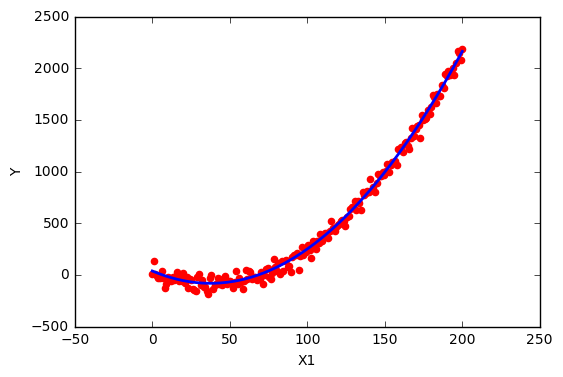

In [173]:
# generate some random data 
MRD=mycoolfun(Xdata,T1a,T2a,T3a) + 50.0 * np.random.normal(size=len(Xdata))

# plot the actual function Y generated w/T1-T3a and the random data
# on top 
%matplotlib inline
plt.plot(Xdata[:,0],mycoolfun(Xdata,T1a,T2a,T3a),lw=2)
plt.xlabel('X1')
plt.ylabel('Y')
plt.scatter(Xdata[:,0],MRD,color='red')

In [183]:
# call the curve fit function from scipy 
from scipy.optimize import curve_fit
[coeff,pcov]=curve_fit(mycoolfun,Xdata,MRD)
                         
# what am I printing here? 
print (coeff)
print (T1a,T2a,T3a)

[ 2.42279398 -1.29517861  0.34163575]
(2.5, -1.5, 0.34)


(array([  8.,  13.,  24.,  39.,  46.,  33.,  20.,  11.,   4.,   2.]),
 array([-112.0424556 ,  -86.41387118,  -60.78528676,  -35.15670234,
          -9.52811792,   16.1004665 ,   41.72905092,   67.35763534,
          92.98621977,  118.61480419,  144.24338861]),
 <a list of 10 Patch objects>)

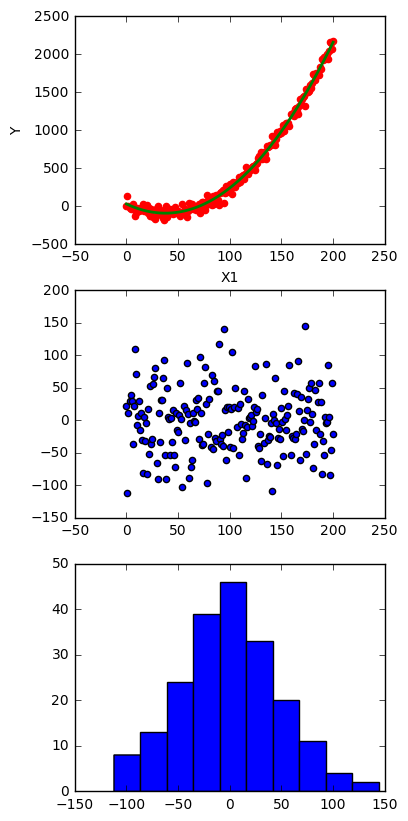

In [187]:
%matplotlib inline
plt.figure(figsize=(4,10))
plt.subplot(311)
plt.plot(Xdata[:,0],mycoolfun(Xdata,coeff[0],coeff[1],coeff[2]),lw=2,color='green')
plt.xlabel('X1')
plt.ylabel('Y')
plt.scatter(Xdata[:,0],MRD,color='red')
plt.subplot(312)
plt.scatter(Xdata[:,0],mycoolfun(Xdata,coeff[0],coeff[1],coeff[2])-MRD)
plt.subplot(313)
plt.hist(mycoolfun(Xdata,coeff[0],coeff[1],coeff[2])-MRD)
